# Advanced Customization

The core principle of `DustPy` is that you can change anything easily. Not only the initial conditions as shown in the previous section, but also the physics behind the simulation.

## Changing the Fragmentation Velocity

In this example we want to have a fragmentation velocity that depends on the temperature in the disk. Is the temperature below 150 K, we want to have a fragmentation velocity of 10 m/s, otherwise it shall be 1 m/s. The idea behind this approach is that particles coated in water ice are stickier that pure silicate particles and can widthstand higher collision velocities. See for example [Pinilla et al. (2017)](https://doi.org/10.3847/1538-4357/aa7edb). However, keep in mind that newer experiments suggest that particles covered in water ice do not have a beneficial collision behavior, see [Musiolik & Wurm (2019)](https://doi.org/10.3847/1538-4357/ab0428).

First, we create our simulation object and initialize it.

In [1]:
from dustpy import Simulation

In [2]:
sim = Simulation()

In [3]:
sim.initialize()

The fragmentation velocity has the shape `(Nr,)`, meaning there is one value at every location in the grid.

In [4]:
sim.dust.v.frag.shape

(100,)

But right now it's constant.

In [5]:
import matplotlib.pyplot as plt

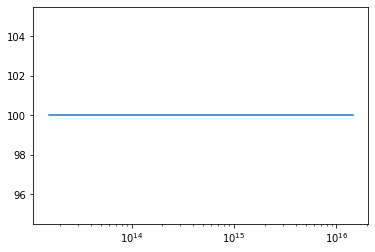

In [6]:
plt.semilogx(sim.grid.r, sim.dust.v.frag)

Now we have to write a function that takes the simulation object as input parameter and returns our desired fragmentation velocities. We can use the fact that the gas temperature has the same shape. Keep in mind that everything has to be in cgs units.

In [7]:
sim.gas.T.shape

(100,)

In [8]:
import numpy as np

In [9]:
def v_frag(sim):
    return np.where(sim.gas.T<150., 1000., 100)

We can now assign this function to the updater of the dust fragmentation velocities. For details of this process, please have a look at the [Simframe documentation](https://simframe.rtfd.io).

In [10]:
sim.dust.v.frag.updater = v_frag

As of now, the simulation object still holds the old data for the fragmentation velocity. We have to tell it to update. We can either update the whole simulation frame with `Simulation.update()`, or we just update the fragmentation velocities.

In [11]:
sim.dust.v.frag.update()

The fragmentation velocities should now show our desired behavior.

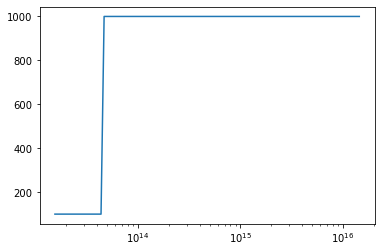

In [12]:
plt.semilogx(sim.grid.r, sim.dust.v.frag)

**Note:** If you customized a quantity on which other quantities depend on, you also have to update these quantities. In our case this would be the sticking/fragmentation probabilites. So it is always better to update the whole simulation frame.

In [13]:
sim.update()

We can now change the data directory to avoid an overwrite error and start the simulation with our new fragmentation velocities.

In [14]:
sim.writer.datadir = "3_data"

In [15]:
sim.run()


DustPy v0.0.1

Documentation: https://dustpy.rtfd.io
PyPI:          https://pypi.org/project/dustpy
GitHub:        https://github.com/stammler/dustpy

Please cite:   Stammler & Birnstiel (in prep.)

Checking for mass conservation...

    - Sticking:
        max. rel. error:  2.81e-14
        for particle collision
            m[114] =  1.93e+04 g    with
            m[116] =  3.73e+04 g
    - Full fragmentation:
        max. rel. error:  4.44e-16
        for particle collision
            m[33] =  5.18e-08 g    with
            m[35] =  1.00e-07 g
    - Cratering:
        max. rel. error:  1.78e-15
        for particle collision
            m[110] =  5.18e+03 g    with
            m[118] =  7.20e+04 g

Creating data directory '3_data'.
Writing file 3_data/data0000.hdf5
Writing dump file 3_data/frame.dmp
Writing file 3_data/data0001.hdf5
Writing dump file 3_data/frame.dmp
Writing file 3_data/data0002.hdf5
Writing dump file 3_data/frame.dmp
Writing file 3_data/data0003.hdf5
Writing dump

We can now have a look at the result of our modifications.

In [16]:
from dustpy import plot

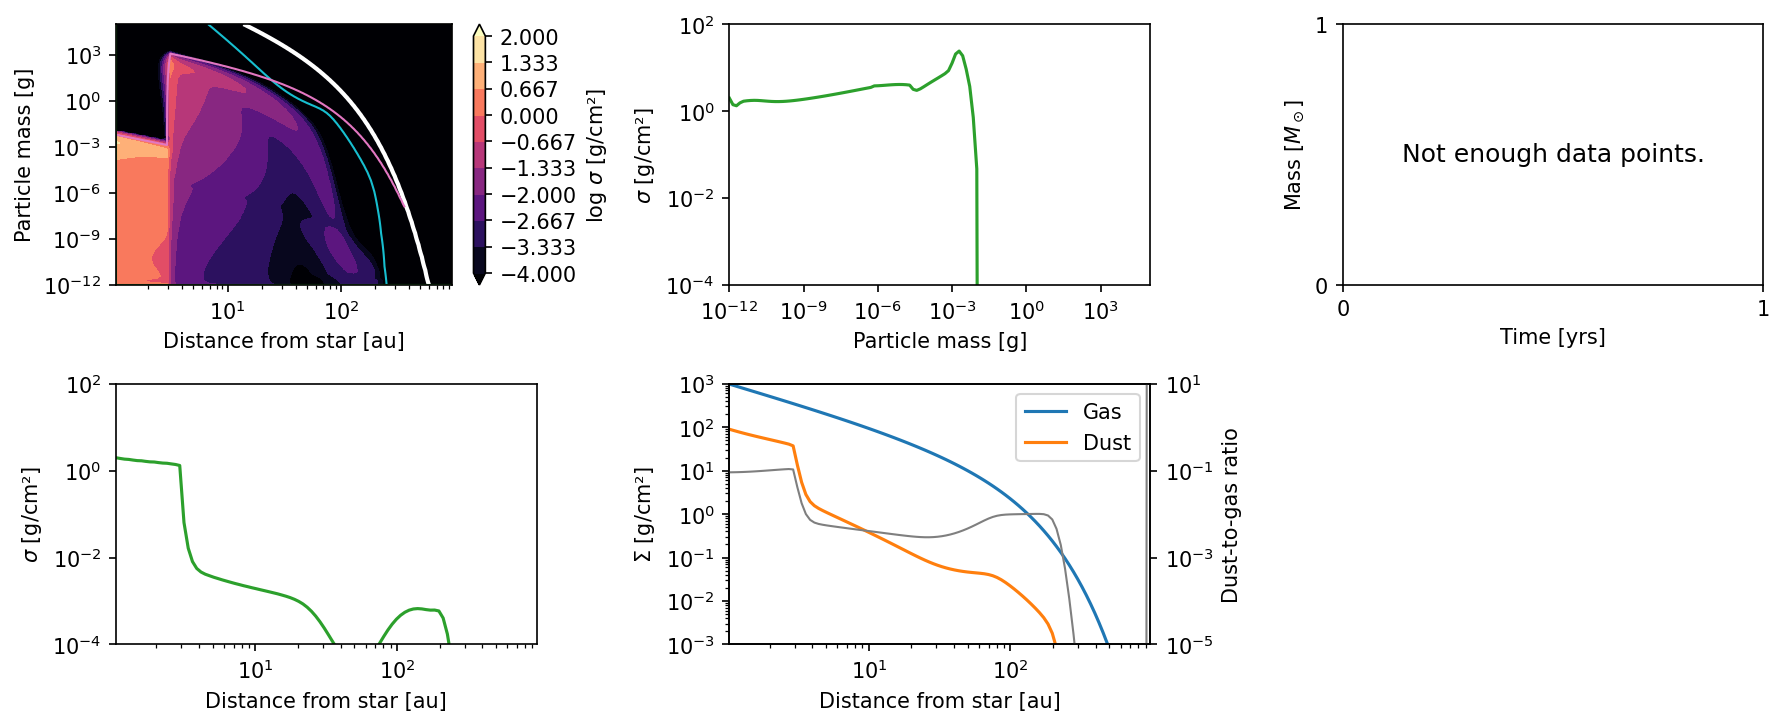

In [17]:
plot.panel(sim)